<div class = "page-header">
    <h1 class = "alert alert-info">
    Reducing dimensionality<br/>
    <small>
        Henrique Gasparini Fiuza do Nascimento - started 2-5-2017<br/>
        From : RDaAH
    </small>
    </h1> 
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>


## Basketbal positions
* **Center**: Usually the tallest player. Position demands a lot of physical contact. On offense, receives ball and shoots close to the basket. Serves as the last line of defense, blocking opponents’ shots and rebounding their misses.

* **Power Forward**: Tall player who relies on strength and toughness to control activity in the lane. Frequently rebounds, especially on defense. Has a decent shot from short-range and scores many points by rebounding missed shots and quickly shooting them.

* **Small Forward**: Versatile and very athletic player. Aggressively attacks the defense by driving and cutting towards the basket, but also has a consistent outside shot.

* **Shooting Guard**: A tenacious defender with an aptitude for stealing the ball. On offense, serves as the secondary ball handler and sharpshooter. Has the ability to convert shots from three-point range.

* **Point Guard**: Leader of offense who uses superb passing and dribbling skills to set up teammates for open shots. Has a reliable jump shot and ability to break down a defense by driving into the lane.

## Feature definition

* **GP **:
    Games Played
* **W**:
    Wins
* **L**:
    Losses
* **MIN**:
    Minutes Played
* **FGM**:
    Field Goals Made
* **FGA**:
    Field Goals Attempted
* **FG%**:
    Field Goal Percentage
* **3PM**:
    3 Point Field Goals Made
* **3PA**:
    3 Point Field Goals Attempted
* **3P%**:
    3 Point Field Goals Percentage
* **FTM**:
    Free Throws Made
* **FTA**:
    Free Throws Attempted
* **FT%**:
    Free Throw Percentage
* **OREB**:
    Offensive Rebounds
* **DREB**:
    Defensive Rebounds
* **REB**:
    Rebounds
* **AST**:
    Assists
* **TOV**:
    Turnovers
* **STL**:
    Steals
* **BLK**:
    Blocks
* **PF**:
    Personal Fouls
* **DD2**:
    Double doubles
* **TD3**:
    Triple doubles
* **PTS**:
    Points
* **+/-**:
    Plus Minus

In [1]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

C:\Users\henrique\Desktop\Polytechnique\3rd year\Projet 3A\Shared Folder\TDA-NBA\notebooks\DimReduction


<h4 class="alert alert-warning"/> Setting up visualization parameters

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h4 class="alert alert-warning"/>Importing Data

In [8]:
#import data
df = pd.read_csv('../../Data/NBA_per_minute_complete_with_positions.csv')
print "(rows,cols) =",df.shape
df.head(5)

(rows,cols) = (476, 28)


,Unnamed: 0,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,PosicNumber
0,0,31,69,36,33,1108,0.443141,0.169675,0.423285,40.1,0.059567,0.166968,35.7,0.044224,0.057762,76.6,0.018953,0.072202,0.091155,0.162455,0.074007,0.027076,0.009025,0.119134,0.000000,0.0,-0.009025,0
1,1,20,78,32,46,1863,0.385937,0.147075,0.310789,47.3,0.022544,0.076221,29.6,0.069243,0.103596,66.8,0.082662,0.189479,0.272142,0.068706,0.035427,0.031669,0.029522,0.082126,0.006441,0.0,-0.040794,1
2,2,21,21,15,6,93,0.193548,0.053763,0.204301,26.3,0.032258,0.107527,30.0,0.053763,0.129032,41.7,0.043011,0.118280,0.161290,0.021505,0.043011,0.064516,0.000000,0.107527,0.000000,0.0,-0.075269,2
3,3,25,52,18,34,486,0.271605,0.109053,0.298354,36.6,0.018519,0.065844,28.1,0.034979,0.053498,65.4,0.041152,0.187243,0.228395,0.059671,0.074074,0.032922,0.022634,0.158436,0.000000,0.0,-0.246914,1
4,4,30,82,48,34,2631,0.474724,0.201064,0.398328,50.5,0.033447,0.097301,34.4,0.039149,0.049031,79.8,0.056252,0.170277,0.226530,0.099962,0.040669,0.025846,0.045990,0.061954,0.006461,0.0,0.087799,4


In [9]:
df.describe()

,Unnamed: 0,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,PosicNumber
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,237.500000,27.052521,54.785714,27.464286,27.321429,1249.697479,0.388082,0.145575,0.328062,44.315966,0.031899,0.093187,27.020588,0.065033,0.088872,71.973319,0.045326,0.136389,0.181715,0.082187,0.055586,0.031932,0.021020,0.093142,0.002341,0.000061,-0.054256,1.880252
std,137.553626,4.407574,24.274576,16.478017,15.219228,845.899601,0.129595,0.050148,0.094805,8.783619,0.030450,0.071533,16.227345,0.038855,0.052069,17.903679,0.037819,0.056240,0.085116,0.057136,0.025943,0.018607,0.021782,0.036185,0.004232,0.000417,0.225870,1.373566
min,0.000000,19.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.666667,0.000000
25%,118.750000,24.000000,37.000000,14.000000,15.000000,473.250000,0.305358,0.111777,0.260750,40.400000,0.003797,0.024265,20.000000,0.038462,0.054381,66.700000,0.016862,0.093688,0.114596,0.044118,0.040139,0.022249,0.006658,0.068182,0.000000,0.000000,-0.127449,1.000000
50%,237.500000,26.000000,62.000000,28.000000,28.000000,1229.000000,0.376882,0.142075,0.320256,43.900000,0.029763,0.095114,32.350000,0.058933,0.080246,75.400000,0.031897,0.125157,0.161617,0.063987,0.052023,0.029754,0.014238,0.086321,0.000000,0.000000,-0.031413,2.000000
75%,356.250000,30.000000,76.000000,40.000000,38.000000,1973.250000,0.460069,0.174128,0.386401,48.200000,0.050396,0.140982,36.725000,0.084538,0.114711,82.600000,0.068989,0.171326,0.235606,0.109149,0.069300,0.038351,0.028140,0.109916,0.002764,0.000000,0.049362,3.000000
max,475.000000,40.000000,82.000000,73.000000,71.000000,3125.000000,1.000000,0.500000,0.666667,100.000000,0.333333,0.340909,100.000000,0.230400,0.333333,100.000000,0.263889,0.352941,0.558824,0.330706,0.201389,0.200000,0.192982,0.333333,0.024756,0.006548,0.666667,4.000000


<h4 class = "alert alert-warning"/> Assign position label for each player <br/> Also taking only numeric values

In [11]:
position_labels = [x for x in df['PosicNumber']]
df_numVar = df.select_dtypes(include=['number']).drop(['Unnamed: 0', 'PosicNumber'],1)
df_numVar.head()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-
0,31,69,36,33,1108,0.443141,0.169675,0.423285,40.1,0.059567,0.166968,35.7,0.044224,0.057762,76.6,0.018953,0.072202,0.091155,0.162455,0.074007,0.027076,0.009025,0.119134,0.000000,0.0,-0.009025
1,20,78,32,46,1863,0.385937,0.147075,0.310789,47.3,0.022544,0.076221,29.6,0.069243,0.103596,66.8,0.082662,0.189479,0.272142,0.068706,0.035427,0.031669,0.029522,0.082126,0.006441,0.0,-0.040794
2,21,21,15,6,93,0.193548,0.053763,0.204301,26.3,0.032258,0.107527,30.0,0.053763,0.129032,41.7,0.043011,0.118280,0.161290,0.021505,0.043011,0.064516,0.000000,0.107527,0.000000,0.0,-0.075269
3,25,52,18,34,486,0.271605,0.109053,0.298354,36.6,0.018519,0.065844,28.1,0.034979,0.053498,65.4,0.041152,0.187243,0.228395,0.059671,0.074074,0.032922,0.022634,0.158436,0.000000,0.0,-0.246914
4,30,82,48,34,2631,0.474724,0.201064,0.398328,50.5,0.033447,0.097301,34.4,0.039149,0.049031,79.8,0.056252,0.170277,0.226530,0.099962,0.040669,0.025846,0.045990,0.061954,0.006461,0.0,0.087799


<h2 class="alert alert-success">
        Performing PCA (dim. reduction)
</h2>
<h4 class = "alert alert-warning"/>Scaling data

In [12]:
df_scaled = sk.preprocessing.scale(df_numVar)

<h4 class = "alert alert-warning"/> Computing new coordinates

In [13]:
pca = sk.decomposition.PCA(n_components=10, whiten=True)
df_red = pca.fit_transform(df_scaled)

print pca.explained_variance_ratio_
print "variance sum =",sum(pca.explained_variance_ratio_)

[ 0.21715565  0.20894822  0.10227063  0.07640689  0.05252312  0.04947878
  0.04088595  0.03512781  0.03143335  0.02955904]
variance sum = 0.843789435218


<h4 class = "alert alert-warning"/> 3D plotting

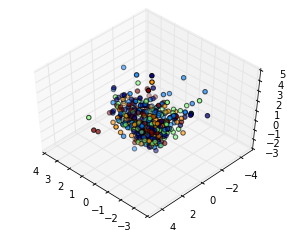

In [14]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=position_labels)

<h4 class = "alert alert-warning"/> 2D plotting

In [16]:
statesN = [0,1,2,3,4]
states = [x for x in statesN]
states

[0, 1, 2, 3, 4]

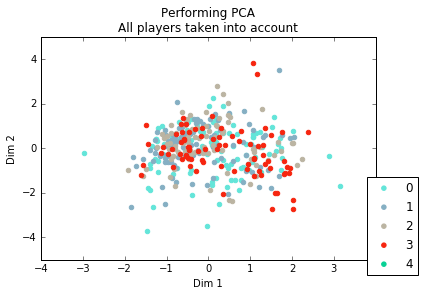

<Container object of 10 artists>

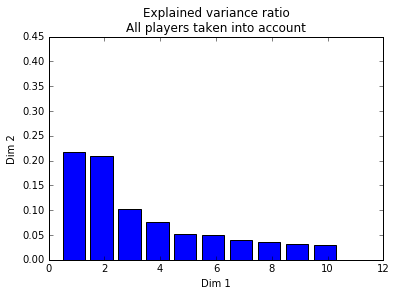

In [18]:
import matplotlib.patches as mpatches
pylab.title("Performing PCA\nAll players taken into account")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [x for x in [0,1,2,3,4]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()


pylab.title("Explained variance ratio\nAll players taken into account") 
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
pylab.ylim(0,.45)
x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
pylab.bar(x_axis,pca.explained_variance_ratio_)

In [19]:
#taking a look to the columns
columns = ["col "+str(i) for i in range(1,len(df_red[0])+1)]
pca_df = pd.DataFrame(data=df_red, columns=columns)
pca_df.head(10)

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10
0,-1.098599,0.200391,0.109440,0.113981,-0.697719,-0.064576,1.418257,-0.077064,0.735943,-0.890758
1,0.417620,-0.731967,-0.791231,0.125159,1.696516,0.132743,-0.653860,-0.192119,-0.402588,-0.283789
2,0.491466,1.557519,0.792778,-0.886240,1.000091,1.071013,-2.335513,0.499056,0.584939,0.190954
3,0.688545,0.641062,0.088651,-0.219379,0.619914,0.117733,0.642150,-1.144521,0.574554,-1.509266
4,-0.284447,-1.012818,-1.273825,0.671939,-0.148174,0.607338,0.523194,0.254619,0.234383,-0.045015
5,0.933974,-0.935634,0.343415,0.703885,-0.928172,0.264273,0.237287,0.466701,0.952098,0.672323
6,-0.411775,-0.244656,-1.212784,0.180725,0.777994,0.614204,-0.571720,-0.503850,0.133853,-0.547717
7,-0.195289,1.223488,0.553719,0.824972,-1.823666,0.654636,-1.063082,-1.158102,0.622447,0.716391
8,3.148239,-1.696616,2.109961,-0.638366,-0.140293,1.736843,-1.945115,-2.188186,1.800171,-2.337562
9,-0.506236,-0.186822,1.685883,0.338964,-0.228022,-0.816837,-1.156181,0.047910,-0.642597,0.256053


<h4 class = "alert alert-warning">Repeting the previous PCA taking into account only two different positions </h4>

In [23]:
# Function that does the previous steps
def PCAForFewPositions (states, dim1 = 1, dim2 = 2, verbose = 0):
    dict = {' PG': 0, ' PF': 1, ' SG' : 2, ' SF' : 3, ' C' : 4}
    invdict = {v: k for k, v in dict.iteritems()}

    posic2 = []
    for x in df['PosicNumber']:
        if x in states :
            posic2.append(x)

    #df2 = df[df['PosicAbbrev'].isin((' SG',' PF',' SF'))]
    df2 = df[np.in1d(np.array(position_labels),states)]

    df_numVar_C_PG = df2.select_dtypes(include=['number'])

    if verbose > 1:
        print len(posic2)
        print df2.shape

    df_scaled_C_PG = sk.preprocessing.scale(df_numVar_C_PG)

    pca = sk.decomposition.PCA(n_components=10)
    df_red_C_PG = pca.fit_transform(df_scaled_C_PG)

    if verbose >0:
        print pca.explained_variance_ratio_
        print "variance sum =",sum(pca.explained_variance_ratio_)

    pcaTitle ="Performing PCA"
    title = "\n Considering only players having the following positions: "

    for i in range(len(states)):
        title = title + invdict[states[i]]
        if i < len(states) - 1:
            title += ", "

    #ploting scatterplot in new dimensions
    pylab.title(pcaTitle + title)
    pylab.xlabel("Dim " + `dim1`)
    pylab.ylabel("Dim " + `dim2`)
    #pylab.scatter(df_red_C_PG[:, dim1-1], df_red_C_PG[:, dim2-1], c=posic2)
    
    statesName = [invdict[x] for x in states]
    for i,s in enumerate(states):
        x = []
        y = []
        for j,_ in enumerate(df_red[:, dim1]):
            if position_labels[j] == s:
                x.append(df_red[j,dim1-1])
                y.append(df_red[j,dim2-1])
        pylab.scatter(x,y,label = statesName[i],color = np.random.rand(3,1))
    
    pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
    pylab.show()
    
    #plotting explined veriance
    if verbose > -1:
        pylab.title("Explained variance ratio" + title)
        pylab.xlabel("Dim 1")
        pylab.ylabel("Dim 2")
        pylab.ylim(0,.45)
        x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
        pylab.bar(x_axis,pca.explained_variance_ratio_)
    
    #plt.bar(range(10),np.cumsum(varArray))
    
    return pca

[ 0.20049627  0.18445145  0.0993829   0.07560877  0.05003051  0.04779248
  0.04429635  0.03843843  0.03292839  0.02973749]
variance sum = 0.803163042704


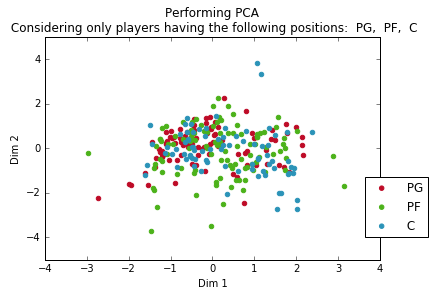

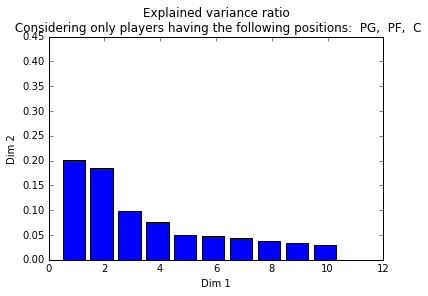

In [24]:
# change the "states" array to set the positions you whant to take into account
states = [0,1,4]
pca = PCAForFewPositions(states, verbose =1)

#M = pca.get_covariance()
#eigVal,eigVec = np.linalg.eig(M)
#eigVal/sum(eigVal)
#eigVec[:,0:2]

[ 0.22234334  0.18836242  0.10328949  0.06628411  0.05297779  0.04561918
  0.04312088  0.03775928  0.03135991  0.03132823]
variance sum = 0.822444633565


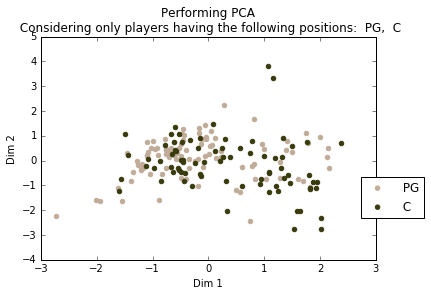

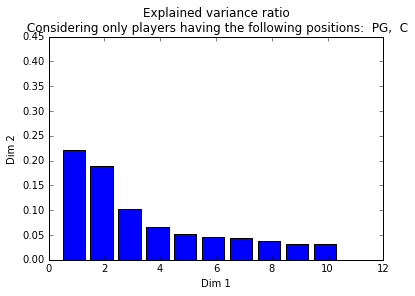

In [25]:
states = [0,4]
pca = PCAForFewPositions(states, verbose = 1)

<h4 class = "alert alert-warning">Plotting circle of dependencies between the original featuresand the new components</h4>

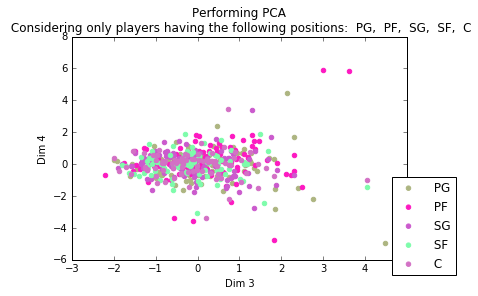

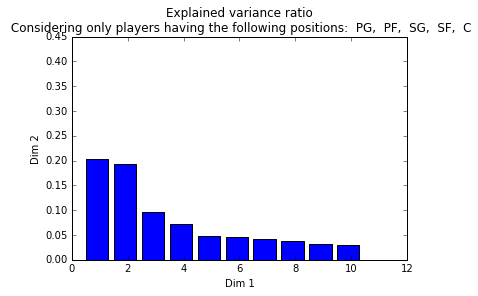

In [26]:
states = [0,1,2,3,4]
pca = PCAForFewPositions(states=states,dim1 = 3, dim2 = 4)

<h2 class="alert alert-success">
     Correlation Graph
</h2>

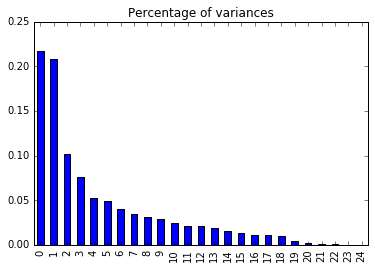

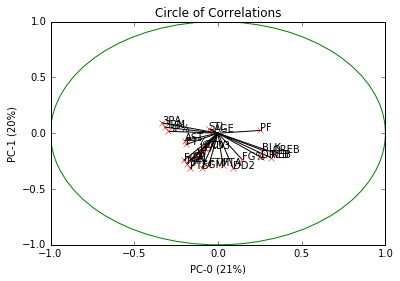

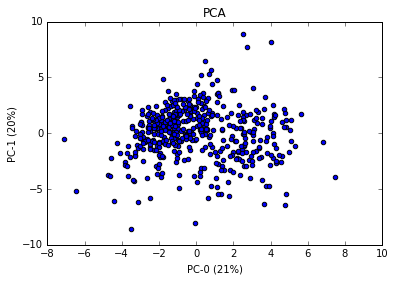

(          PC-0      PC-1      PC-2      PC-3      PC-4      PC-5      PC-6  \
 AGE  -0.026863  0.018017 -0.135241 -0.026763 -0.580665 -0.017745  0.238835   
 GP   -0.153006 -0.234841 -0.415621 -0.073090  0.146386 -0.102092  0.068573   
 W    -0.128974 -0.201678 -0.356663 -0.046938 -0.184189  0.133847 -0.062336   
 L    -0.104401 -0.156212 -0.276750 -0.065757  0.432909 -0.307753  0.176866   
 MIN  -0.187693 -0.272319 -0.284010 -0.099588  0.186897 -0.039590  0.060673   
 PTS  -0.165328 -0.314495  0.237789  0.251680 -0.019269 -0.022710  0.056404   
 FGM  -0.095632 -0.310548  0.195341  0.301256  0.006095 -0.006302  0.232997   
 FGA  -0.203124 -0.241797  0.272557  0.227179  0.053568  0.017279  0.062468   
 FG%   0.141311 -0.230959 -0.098652  0.206844 -0.152930 -0.105950  0.293974   
 3PM  -0.318062  0.053206  0.028606  0.275652 -0.005236  0.266305 -0.122636   
 3PA  -0.334153  0.092010  0.056977  0.201224  0.021400  0.188245 -0.117857   
 3P%  -0.296236  0.017070 -0.067699  0.150957  0.048

In [27]:
import corrGraph.analysis as ana

ana.myPCA(df=pd.DataFrame(df_numVar))

<h2 class="alert alert-success">
        ANALYSIS
</h2>

In this first phase of the analysis, we performed several Principal Component Analysis' (PCA's) from our scaled dataset in order to visualize some of the information contained in it. During this phase, we based our analysis on the "preconceived" position labels in modern basketball (Center, Power Forward, Small Forward, Shooting Guard and Point Guard) in order to see if our variables were representative of these positions. This way, we could evaluate, empirically, the potential of our dataset for challenging this predefined labels and, therefore, be able to propose new classifications. 
   
The PCA performed in figure X shows that there are differences between the position even when taking into account only the two main dimensions of the PCA (that is the dimensions that represent the best the variability in the data). We, however, noticed that it is mainly the second dimension of the PCA that is responsible for the identification of a player position. We can see, for example, that positions where the player tends to attack more (Center and Power Forrwards for example) have greater values of Dim 2.   
    

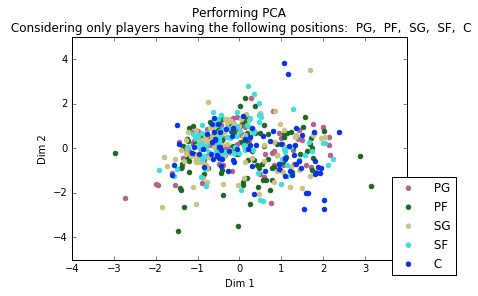

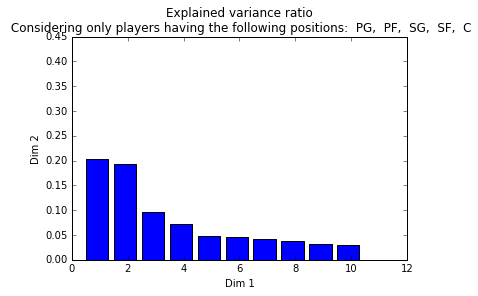

In [28]:
pca = PCAForFewPositions(states = [0,1,2,3,4])

Nonetheless, we can still see a significant overlap among these 5 position, which motivates us to propose a new classification. (essa parte foi cartas mesmo)
    
We also performed the PCA taking into account only players that have very different positions, in order to see if our data would place them in different regions. in Figure X, we can see that, when the PCA is applied to the Point Guards and Centers, these two positions can be identified according to theirs regions in the graph, although there is still some overlap between them.

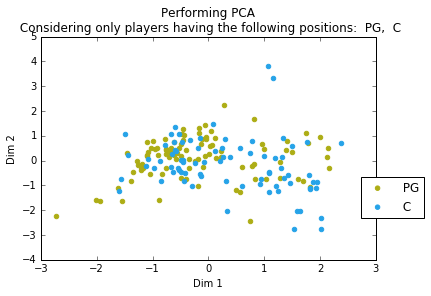

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
PCAForFewPositions(states = [0,4], verbose= -1)

In order to see the correlation between the variables, we also plotted the correlation map (also called variables factor map), shown in Figure X. It contains, for each feature, its correlation to the dimensions one and two, represented as coordinates x and y, respectively. We can see that the variable that contribute the most in the dimension one (that is, that are most correlated to it) are the ones related to the number of points or goals made. On the other hand, regarding the dimension 2, the features most correlated to it tend to concern the position of the player in the field. For example, the number of blocks made and rebounds taken by a player tends to be greater if he occupies positions situated further from the goal, such as Point Guards and shooting Guards, as shown in figure X.

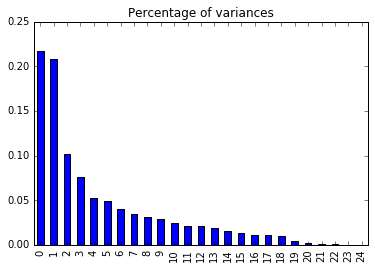

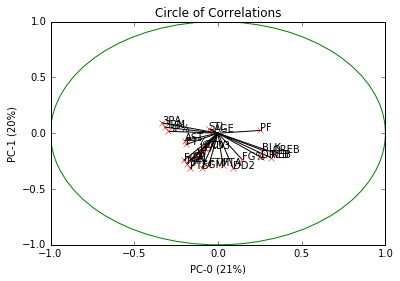

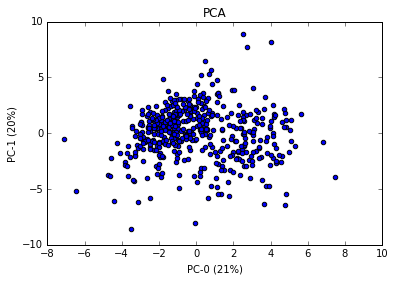

(          PC-0      PC-1      PC-2      PC-3      PC-4      PC-5      PC-6  \
 AGE  -0.026863  0.018017 -0.135241 -0.026763 -0.580665 -0.017745  0.238835   
 GP   -0.153006 -0.234841 -0.415621 -0.073090  0.146386 -0.102092  0.068573   
 W    -0.128974 -0.201678 -0.356663 -0.046938 -0.184189  0.133847 -0.062336   
 L    -0.104401 -0.156212 -0.276750 -0.065757  0.432909 -0.307753  0.176866   
 MIN  -0.187693 -0.272319 -0.284010 -0.099588  0.186897 -0.039590  0.060673   
 PTS  -0.165328 -0.314495  0.237789  0.251680 -0.019269 -0.022710  0.056404   
 FGM  -0.095632 -0.310548  0.195341  0.301256  0.006095 -0.006302  0.232997   
 FGA  -0.203124 -0.241797  0.272557  0.227179  0.053568  0.017279  0.062468   
 FG%   0.141311 -0.230959 -0.098652  0.206844 -0.152930 -0.105950  0.293974   
 3PM  -0.318062  0.053206  0.028606  0.275652 -0.005236  0.266305 -0.122636   
 3PA  -0.334153  0.092010  0.056977  0.201224  0.021400  0.188245 -0.117857   
 3P%  -0.296236  0.017070 -0.067699  0.150957  0.048

In [30]:
ana.myPCA(df=pd.DataFrame(df_numVar))